# Enter Numba

In order to see how Numba is used, and what advantages it provides, let us take a look at an example problem.

What we would be doing is naively simulating diffusion. In order to do that, we will apply an iterative process over a lattice.

We will assume that we have some initial concentration $C_{i,j}$ at each point, and a diffusion coefficient $d_{i,j} = e^{-1/T_{i,j}}$ corresponding to each point in the 2D lattice, where $T_{i,j}$ is the temperature at that point. The concentrations would evolve as,
$$
C_{i,j} = (1 - d_{i,j})C_{i,j} + \sum_{(i',j') \in \text{neighbours}} 0.25*d_{i',j'} C_{i',j'}
$$

Also, for the sake of ease, we shall consider periodic boundaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def update_lattice(C, d):
    assert C.shape == d.shape
    
    I, J = C.shape
    
    C_temp = C.copy()
    
    for i in range(I):
        for j in range(J):
            C[i,j] = (1 - d[i,j])*C_temp[i,j] +\
                    0.25*d[(i+1)%I,j]*C_temp[(i+1)%I,j] +\
                    0.25*d[(i-1)%I,j]*C_temp[(i-1)%I,j] +\
                    0.25*d[i,(j+1)%J]*C_temp[i,(j+1)%J] +\
                    0.25*d[i,(j-1)%J]*C_temp[i,(j-1)%J]                 

Next, let us also define the "Energy" associated with a configuration as a simple scaling of temperature and concentration at each point. Say,
$$
E = \sum_{i,j} T_{i,j} C_{i,j}^2
$$

In [3]:
def get_total_energy(C, T):    
    return np.sum(C*C*T) # This is an elementwise multiplication followed by sum over all components

Now, let's initialize a point source at origin, and check how the system evolves for a constant temperature

In [11]:
def evolve_lattice(C,d,T, steps, energies):
    for i in range(steps):
        update_lattice(C,d)
        energies.append(get_total_energy(C,T))

In [5]:
N = 101

C = np.zeros((N,N))
T = np.ones((N,N))
d = np.exp(-1./T)

C[N//2, N//2] = 100.

energies = []

steps = 201
C_init = C.copy()

In [14]:
%time evolve_lattice(C,d,T,steps, energies)

CPU times: user 634 ms, sys: 24.8 ms, total: 659 ms
Wall time: 816 ms


In [7]:
C_final = C.copy()

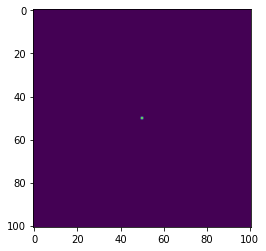

In [8]:
plt.imshow(C_init)

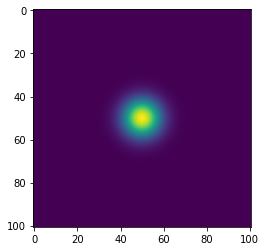

In [9]:
plt.imshow(C_final)

Let us plot the energies

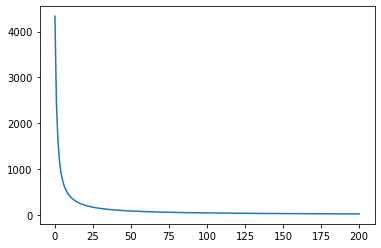

In [10]:
plt.plot(energies)
plt.show()

In [12]:
from numba import njit

In [13]:
@njit
def update_lattice(C, d):
    assert C.shape == d.shape
    
    I, J = C.shape
    
    C_temp = C.copy()
    
    for i in range(I):
        for j in range(J):
            C[i,j] = (1 - d[i,j])*C_temp[i,j] +\
                    0.25*d[(i+1)%I,j]*C_temp[(i+1)%I,j] +\
                    0.25*d[(i-1)%I,j]*C_temp[(i-1)%I,j] +\
                    0.25*d[i,(j+1)%J]*C_temp[i,(j+1)%J] +\
                    0.25*d[i,(j-1)%J]*C_temp[i,(j-1)%J]       

In [18]:
N = 101

C = np.zeros((N,N))
T = np.ones((N,N))
d = np.exp(-1./T)

C[N//2, N//2] = 100.

energies = []

steps = 201
C_init = C.copy()

In [19]:
%time evolve_lattice(C,d,T,steps, energies)

CPU times: user 412 ms, sys: 3.95 ms, total: 416 ms
Wall time: 413 ms


In [20]:
C_final = C.copy()